In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split





In [2]:
df=pd.read_csv("/content/loan_approval_dataset.csv")


In [3]:
df.columns=df.columns.str.strip()
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df["education"] = df['education'].str.strip().str.lower()

df['self_employed']=df['self_employed'].str.strip().str.lower()

df['loan_status']=df['loan_status'].str.strip().str.lower()
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,graduate,no,9600000,29900000,12,778,2400000,17600000,22700000,8000000,approved
1,2,0,not graduate,yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,rejected
2,3,3,graduate,no,9100000,29700000,20,506,7100000,4500000,33300000,12800000,rejected
3,4,3,graduate,no,8200000,30700000,8,467,18200000,3300000,23300000,7900000,rejected
4,5,5,not graduate,yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,graduate,yes,1000000,2300000,12,317,2800000,500000,3300000,800000,rejected
4265,4266,0,not graduate,yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,approved
4266,4267,2,not graduate,no,6500000,23900000,18,457,1200000,12400000,18100000,7300000,rejected
4267,4268,1,not graduate,no,4100000,12800000,8,780,8200000,700000,14100000,5800000,approved


In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,graduate,no,9600000,29900000,12,778,2400000,17600000,22700000,8000000,approved
1,2,0,not graduate,yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,rejected
2,3,3,graduate,no,9100000,29700000,20,506,7100000,4500000,33300000,12800000,rejected
3,4,3,graduate,no,8200000,30700000,8,467,18200000,3300000,23300000,7900000,rejected
4,5,5,not graduate,yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,graduate,yes,1000000,2300000,12,317,2800000,500000,3300000,800000,rejected
4265,4266,0,not graduate,yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,approved
4266,4267,2,not graduate,no,6500000,23900000,18,457,1200000,12400000,18100000,7300000,rejected
4267,4268,1,not graduate,no,4100000,12800000,8,780,8200000,700000,14100000,5800000,approved


In [6]:
le = LabelEncoder()


In [7]:
df['education']=le.fit_transform(df['education'])

df['self_employed']=le.fit_transform(df['self_employed'])

df['loan_status']=le.fit_transform(df['loan_status'])
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [31]:
X = df.drop(columns=['loan_id', 'loan_status'])

y=df["loan_status"]


In [32]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [10]:
df.tail(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0
4268,4269,1,0,0,9200000,29700000,10,607,17800000,11800000,35700000,12000000,0


In [11]:
df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,int64
self_employed,int64
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [12]:
df.rename(columns={"residential_assets_value":"rav","commercial_assets_value":"cav","luxury_assets_value":"lav","bank_asset_value":"bav"})

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,rav,cav,lav,bav,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [13]:
df.count()

,0
loan_id,4269
no_of_dependents,4269
education,4269
self_employed,4269
income_annum,4269
loan_amount,4269
loan_term,4269
cibil_score,4269
residential_assets_value,4269
commercial_assets_value,4269


In [14]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [15]:
df=pd.DataFrame(df)
x=df.drop("loan_status",axis=1)
y=df["loan_status"]

In [16]:
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

<ipython-input-33-97d4cffadf72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status",data=df,palette="coolwarm")


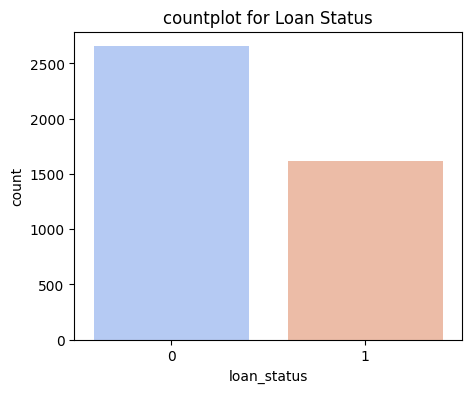

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(x="loan_status",data=df,palette="coolwarm")
plt.title("countplot for Loan Status")
plt.show()

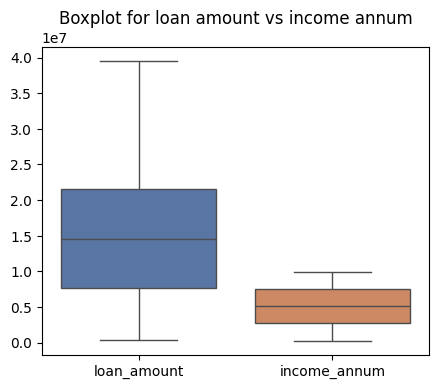

In [18]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df[["loan_amount","income_annum"]],palette="deep")
plt.title("Boxplot for loan amount vs income annum")
plt.show()


<ipython-input-19-82409f65eb32>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="education",y="loan_term",data=df,palette="colorblind")


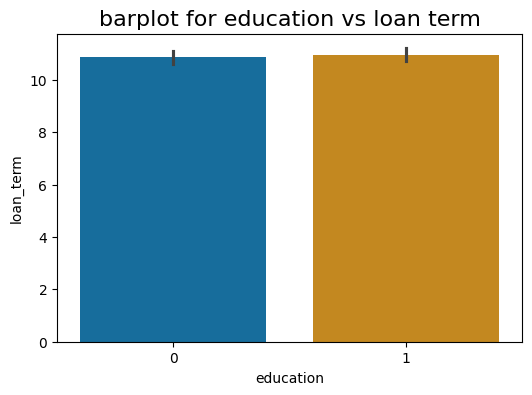

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x="education",y="loan_term",data=df,palette="colorblind")
plt.title("barplot for education vs loan term",fontsize=16)
plt.show()


<ipython-input-20-00e25762c8a5>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["loan_term"],bins=25,kde=True,palette="mako")


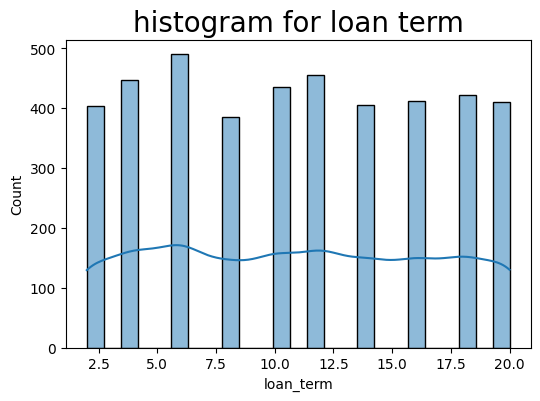

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df["loan_term"],bins=25,kde=True,palette="mako")
plt.title("histogram for loan term",fontsize=20)
plt.show()


<ipython-input-21-cd7037c52f03>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x="loan_amount",y="income_annum",palette="dark")


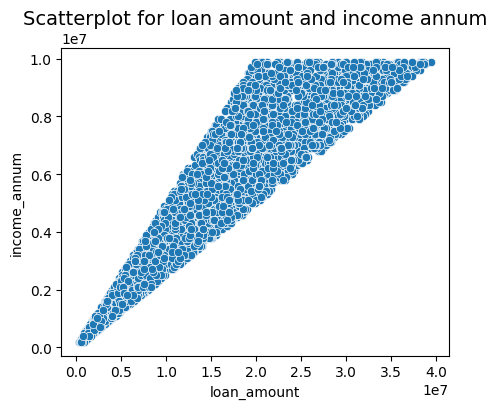

In [21]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x="loan_amount",y="income_annum",palette="dark")
plt.title("Scatterplot for loan amount and income annum",fontsize=14)
plt.show()


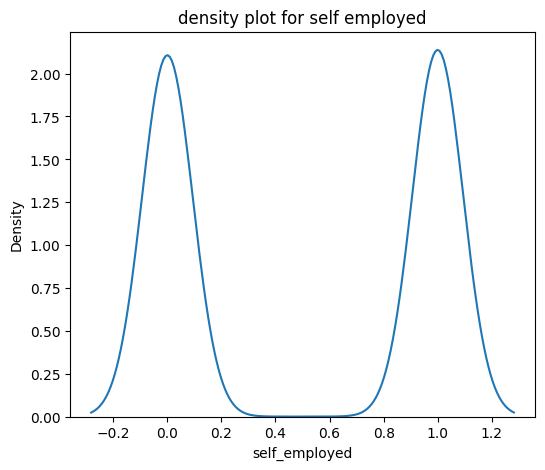

In [22]:
plt.figure(figsize=(6,5))
sns.kdeplot(x="self_employed",data=df)
plt.title("density plot for self employed")
plt.show()


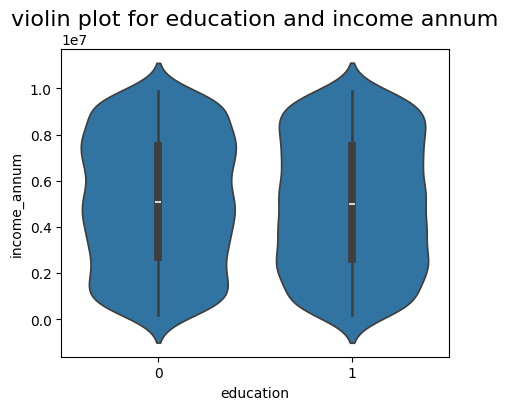

In [23]:
plt.figure(figsize=(5,4))
sns.violinplot(x="education",y="income_annum",data=df)
plt.title("violin plot for education and income annum",fontsize=16)
plt.show()


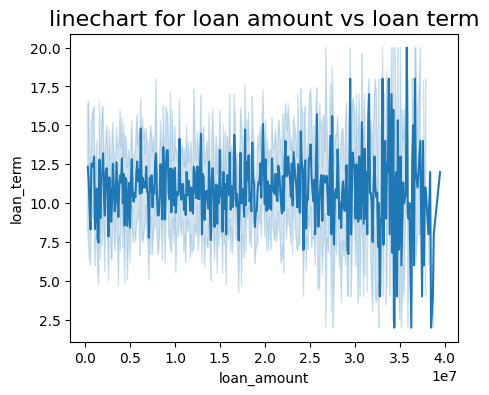

In [24]:
plt.figure(figsize=(5,4))
sns.lineplot(x="loan_amount",y="loan_term",data=df)
plt.title("linechart for loan amount vs loan term",fontsize=16)
plt.show()


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=42)

In [26]:
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [27]:
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy*100:.2f}%')


Accuracy:97.66%


In [29]:
ypd=label_encoder.inverse_transform(y_pred)
print(f'Predicted values:{ypd}')


Predicted values:[1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0